In [2]:
using Plots
ENV["MPLBACKEND"] = "Agg"
pyplot()
n = 50
cs = Plots.unzip(Plots.partialcircle(0.5π, 11π/6, 3, 10));

In [3]:
xs = 3randn(n,3)
ys = 3randn(n,3)
for i in 1:3
    xs[:,i] += cs[1][i]
    ys[:,i] += cs[2][i]
end

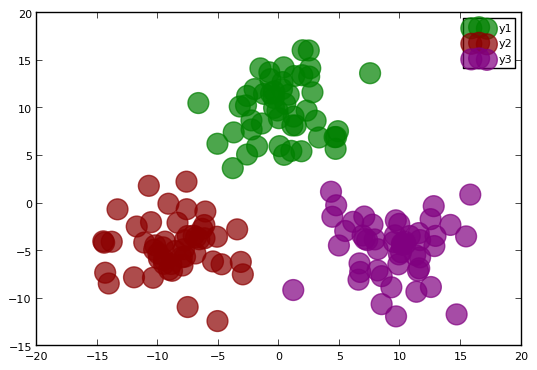

In [8]:
colors = [:green,:darkred,:purple]
scatter(xs, ys, grid=false, m=(colors',15,0.7), markerstrokecolor=colors')

In [34]:
using OnlineAI

net = buildTanhClassificationNet(
    2, 1, [5,5,5],
    params = NetParams(gradientModel = AdaMaxModel(η=1e-4, ρ1=0.9, ρ2=0.9)),
    solverParams = SolverParams(maxiter=1000000,erroriter=500000)
);

In [35]:
dps = DataPoints(hcat(reshape(xs,3n,1),reshape(ys,3n,1)), vcat(-ones(n), zeros(n), ones(n)))
sampler = SimpleSampler(dps)
solve!(net, sampler, sampler)


solve: NeuralNet{
  params: NetParams{OnlineAI.AdaMaxModel(0.0001,0.9,0.9,1.0e-6) NoDropout OnlineAI.L2CostModel()}
  solverParams: OnlineAI.SolverParams(1000000,500000,10000,-1,[:x,:xhat,:y,:Σ,:a],100,1.0e-5,OnlineAI.donothing)
  layers:
    NormalizedLayer{2=>5 OnlineAI.TanhActivation() p=1.0 ‖δΣ‖₁=0.0 ‖δy‖₁=0.0 }
    NormalizedLayer{5=>5 OnlineAI.TanhActivation() p=1.0 ‖δΣ‖₁=0.0 ‖δy‖₁=0.0 }
    NormalizedLayer{5=>5 OnlineAI.TanhActivation() p=1.0 ‖δΣ‖₁=0.0 ‖δy‖₁=0.0 }
    NormalizedLayer{5=>1 OnlineAI.TanhActivation() p=1.0 ‖δΣ‖₁=0.0 ‖δy‖₁=0.0 }
}


Status: SolverStats{RUNNING n=500000, trainerr=5.342969524194266e-6, valerr=5.342969524194266e-6, besterr=Inf, epochSinceImprovement=0}


SolverStats{CONVERGED n=500000, trainerr=5.342969524194266e-6, valerr=5.342969524194266e-6, besterr=5.342969524194266e-6, epochSinceImprovement=0}

Converged, breaking: SolverStats{RUNNING n=500000, trainerr=5.342969524194266e-6, valerr=5.342969524194266e-6, besterr=5.342969524194266e-6, epochSinceImprovement=0}


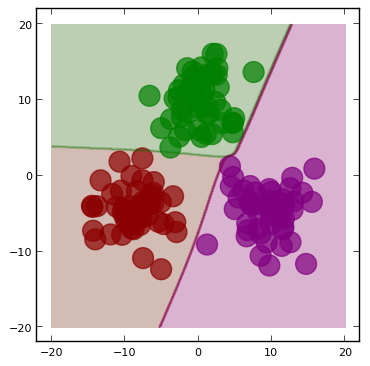

In [36]:
x = linspace(-20, 20, 1000)
cmap = ColorGradient(colors, alpha=0.3)

function surf(x,y)
    z = predict(net, Float64[x,y])[1]
    if z < -0.3
        -1.0
    elseif z > 0.3
        1.0
    else
        0.0
    end
end

# use contours to show the predictions from the neural net
p = plot(x, x, surf, w=2, fill=true, c=cmap, leg=false, grid=false, nlevels=3, size=(400,400))
scatter!(xs, ys, grid=false, m=(colors',15,0.7), markerstrokecolor=colors')